In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import itertools

sys.path.append("/pds/pds11/hoyun/library/")

import defaultPlot
import stringFormat as sf
import dataProcess as dp

from data import Data
from observable import Observable

In [2]:
observable_list = [Observable.maximum_cluster_size,
                   Observable.second_maximum_cluster_size,
                   Observable.mean_cluster_size,
                   Observable.second_moment,
                   Observable.inter_event_time,
                   Observable.max_delta_order_parameter]
network_size_list = [10000]
acceptance_threshold_list = [0.5]
data_dict: dict[tuple[int,float], Data] = {}


In [6]:
for network_size, acceptance_threshold in itertools.product(network_size_list, acceptance_threshold_list):
    current = network_size, acceptance_threshold
    data_dict[current] = Data(*current)
    data_dict[current].read(observable_list)

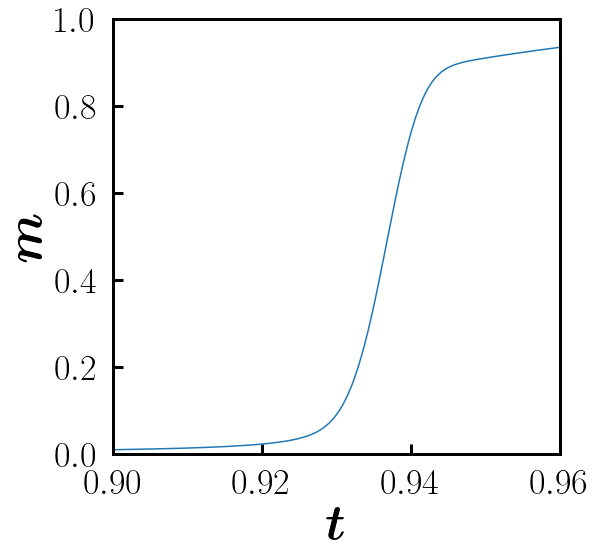

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
network_size, acceptance_threshold = current = 10000, 0.5

t, op = dp.avg_lin_bin(data_dict[current].time,
                       data_dict[current].maximum_cluster_size / network_size,
                       delta=1e-4)

ax.plot(t, op)

ax.set_xlim(0.90, 0.96)
ax.set_ylim(0.0, 1.0)
ax.set_xlabel(sf.latex_bold_string("t"))
ax.set_ylabel(sf.latex_bold_string("m"))

fig.show()
